In [12]:
import pyarrow.parquet as pq
ticker='DOGE-USDT'
df  = pq.read_table(f'{ticker}.parquet').to_pandas().reset_index(drop=False)
df  = df[['open_time','open','close','high','low','volume']]
df = df.rename(columns={'open_time':'Date','open':'Open','close':'Close','high':'High','low':'Low','volume':'Volume'})
df = df.dropna()
df = df.sort_values('Date')
df.head()

,Date,Open,Close,High,Low,Volume
0,2019-07-05 12:00:00,0.00449,0.004200,0.004600,0.003760,60726008.0
1,2019-07-05 12:01:00,0.00420,0.004300,0.004387,0.004200,84307704.0
2,2019-07-05 12:02:00,0.00430,0.004475,0.004475,0.004300,48182744.0
3,2019-07-05 12:03:00,0.00445,0.004250,0.004450,0.004169,66457852.0
4,2019-07-05 12:04:00,0.00425,0.004350,0.004385,0.004250,22016424.0


In [45]:
ticker='DOGE-USDT'
df  = pq.read_table(f'{ticker}.parquet').to_pandas().reset_index(drop=False)
df  = df[['open_time','open','close','high','low','volume']]
df = df.rename(columns={'open_time':'Date','open':'Open','close':'Close','high':'High','low':'Low','volume':'Volume'})

# turn on during test_multiprocessing
df

,Date,Open,Close,High,Low,Volume
0,2019-07-05 12:00:00,0.004490,0.004200,0.004600,0.003760,60726008.0
1,2019-07-05 12:01:00,0.004200,0.004300,0.004387,0.004200,84307704.0
2,2019-07-05 12:02:00,0.004300,0.004475,0.004475,0.004300,48182744.0
3,2019-07-05 12:03:00,0.004450,0.004250,0.004450,0.004169,66457852.0
4,2019-07-05 12:04:00,0.004250,0.004350,0.004385,0.004250,22016424.0
...,...,...,...,...,...,...
780636,2020-12-29 23:55:00,0.004491,0.004493,0.004493,0.004491,20251.0
780637,2020-12-29 23:56:00,0.004487,0.004495,0.004497,0.004486,368361.0
780638,2020-12-29 23:57:00,0.004495,0.004500,0.004500,0.004493,71161.0
780639,2020-12-29 23:58:00,0.004500,0.004488,0.004500,0.004488,33939.0


In [80]:
ticker='VTHO-USDT'
df  = pq.read_table(f'{ticker}.parquet').to_pandas().reset_index(drop=False)
df  = df[['open_time','open','close','high','low','volume']]
df = df.rename(columns={'open_time':'Date','open':'Open','close':'Close','high':'High','low':'Low','volume':'Volume'})

# turn on during test_multiprocessing
df = df[df['Date'].astype(str).str.contains(':00:00.*')==True].reset_index(drop=True)
df = df.dropna()
df = df.sort_values('Date')
# insert indicators to df 2021_02_21_17_54_Crypto_trader




depth = len(list(df.columns[1:])) # OHCL + indicators without Date

df = df[100:].dropna()

lookback_window_size = 150
test_window = 720*3 # 3 months

# split training and testing datasets
train_df = df[:-test_window-lookback_window_size] # we leave 100 to have properly calculated indicators
test_df = df[-test_window-lookback_window_size:]


In [81]:
len(train_df)

6829

<AxesSubplot:xlabel='Date'>

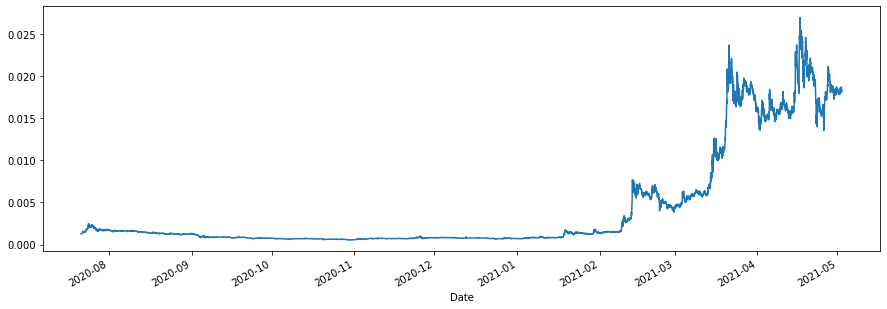

In [82]:
train_df.set_index("Date").Close.plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

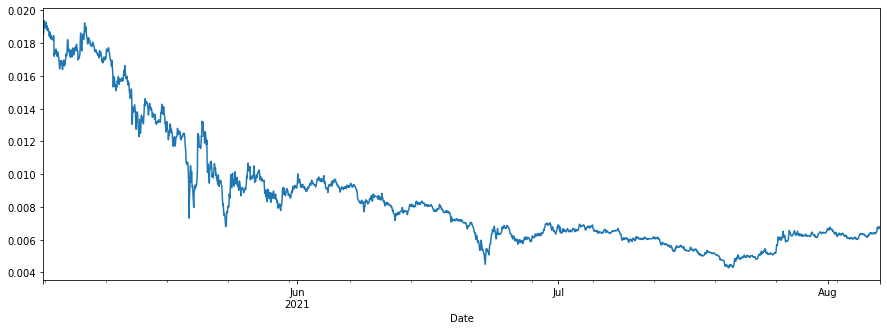

In [83]:
test_df.set_index("Date").Close.plot(figsize=(15,5))

In [84]:
len(test_df)

2310

In [1]:
# now get Binance Data using test.py
# or implement RL model into test.py